In [49]:
library(tidyverse)

#### Parameters: b0, alpha, sigma

 - Choose prior
 - Evaluate MCMC
 - Evaluate posteriors

In [2]:
#True params
b0 <- 0
alpha <- pi/4
sigma <- 1

xs <- runif(10, 0, 10)
ys <- rnorm(10, b0 + tan(alpha)*xs, sd = sigma)

xs.line <- seq(from = 0, to = 10, by = 0.001)
ys.line <- b0 + tan(alpha)*xs.line

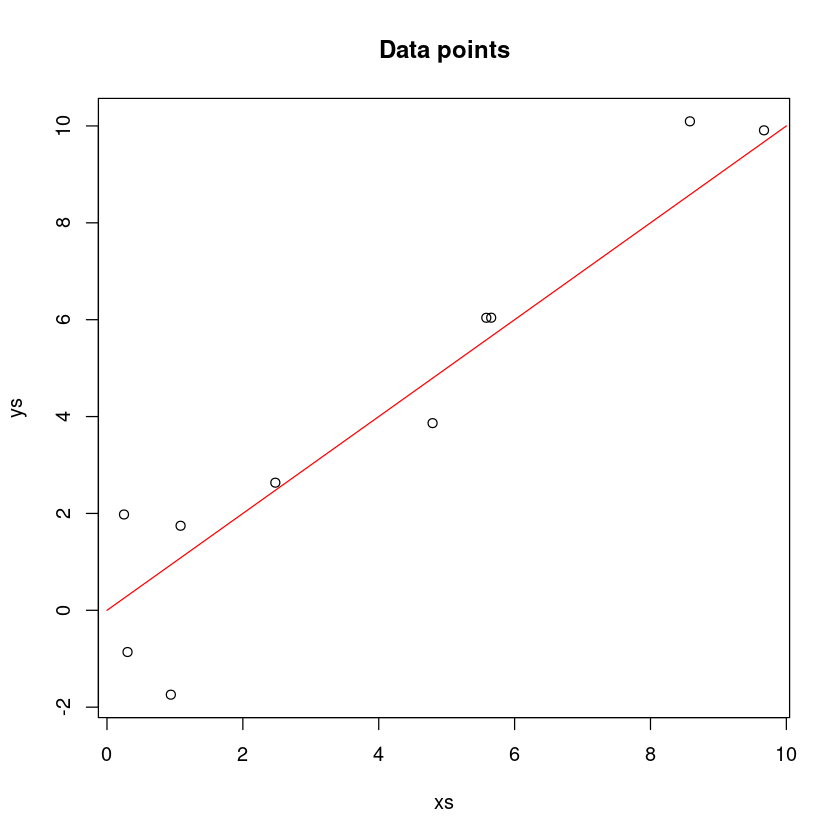

In [3]:
plot(xs, ys, main = "Data points")
lines(xs.line, ys.line, col = "red")

#### Posterior: p(data|theta) * p(theta)

In [58]:
N.samples <- 100000
alpha.init <- pi/3
b.init <- 0.3
s.init <- 0.2

params <- matrix(0, nrow = 3, ncol = N.samples)
params[, 1] <- c(alpha.init, b.init, s.init)


post <- function(xs, ys, alpha, beta, sigma){
    post_l <- dnorm(ys, xs*tan(alpha) + beta, sd = sigma, log = TRUE)
    return(sum(post_l) - 1/2 * log(sigma))
}

alpha.max <- alpha.init
b.max <- b.init
s.max <- s.init

for(i in 1:N.samples){
    alpha.proposal <- rnorm(1, alpha.init, sd = 0.2)
    while(alpha.proposal > pi/2 | alpha.proposal < - pi/2){
        alpha.proposal <- rnorm(1, alpha.init, sd = 0.2)
    }
    b.proposal <- rnorm(1, b.init, sd = 0.3)
    while(b.proposal > 5 | b.proposal < -5){
        b.proposal <- rnorm(1, b.init, sd = 0.3)
    }
    
    s.proposal <- rnorm(1, s.init, sd = 0.1)
    while(s.proposal <= 0 | s.proposal >= 2){
        s.proposal <- rnorm(1, s.init, sd = 0.1)
    }
    
    rho <- post(xs, ys, alpha.proposal, b.proposal, s.proposal) - post(xs, ys, alpha.init, b.init, s.init)
    rho <- rho %>% exp
    
    rho <- min(rho, 1)
    
    u <- runif(1, 0, 1)
    if(rho >= u){        
        alpha.init <- alpha.proposal
        b.init <- b.proposal
        s.init <- s.proposal
    }
    
    if(post(xs, ys, alpha.proposal, b.proposal, s.proposal) > post(xs, ys, alpha.max, b.max, s.max)){
        alpha.max <- alpha.proposal
        b.max <- b.proposal
        s.max <- s.proposal
    }
    
    
    params[ , i] <- c(alpha.init, b.init, s.init)
    
}

In [36]:
burn_in <- 10000

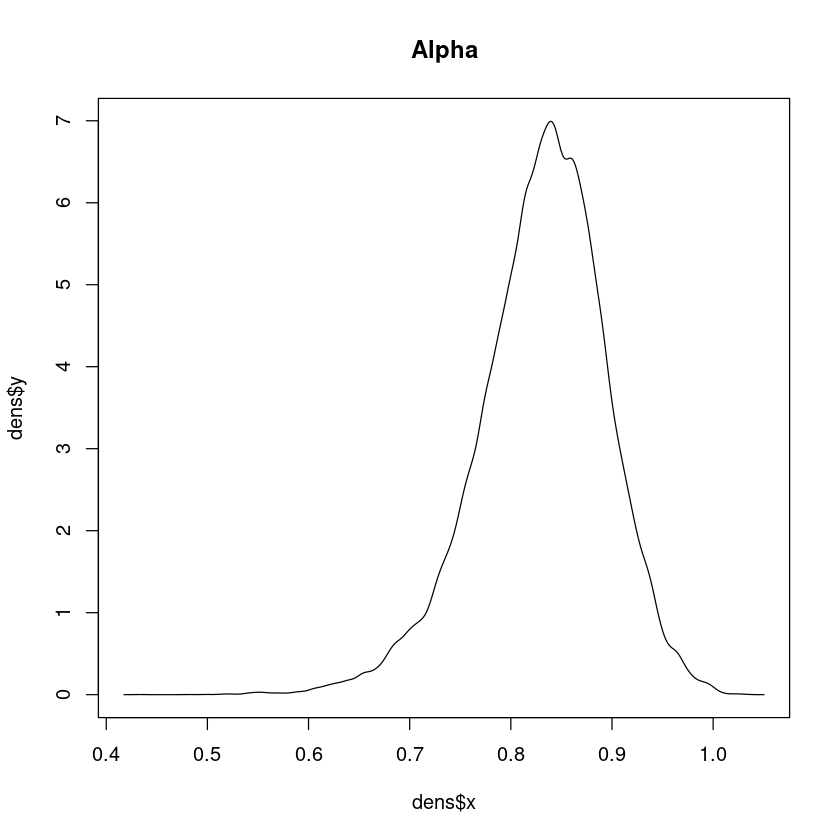

In [41]:
alphas <- params[1, burn_in:ncol(params)]
dens <- density(alphas)

plot(dens$x, dens$y, "l", main = "Alpha")

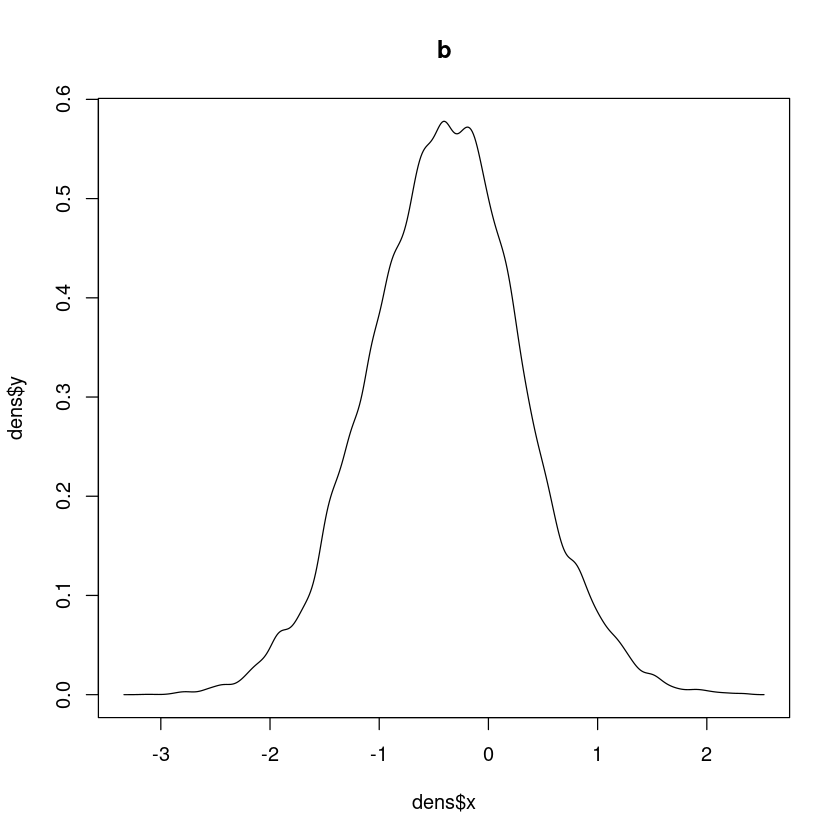

In [39]:
bs <- params[2, burn_in:ncol(params)]
dens <- density(bs)
plot(dens$x, dens$y, "l", main = "b")

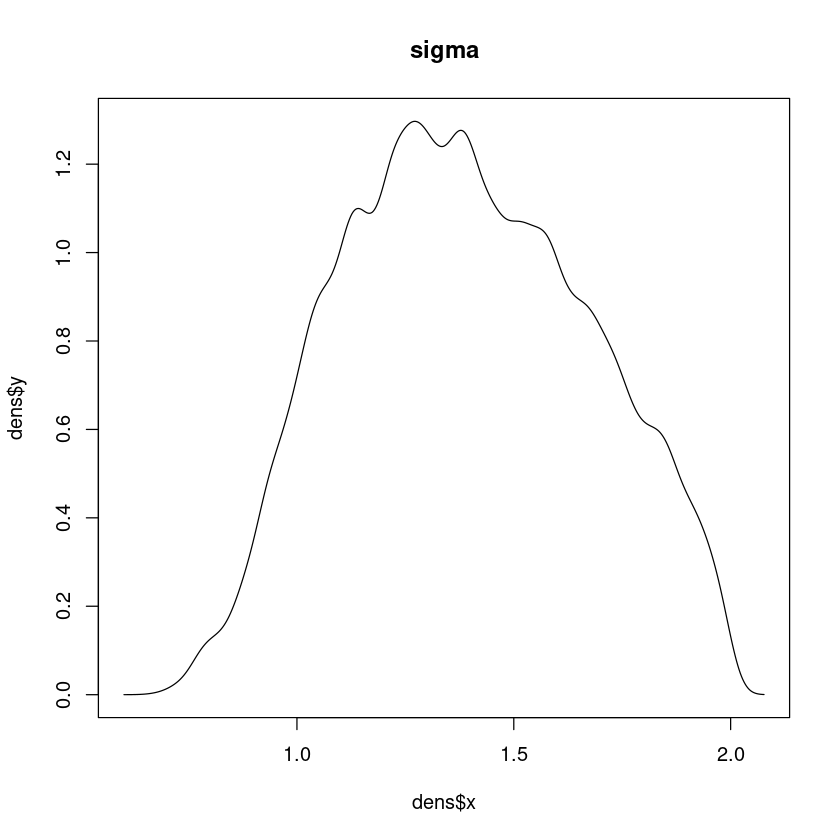

In [40]:
sigmas <- params[3, burn_in:ncol(params)]
dens <- density(sigmas)
plot(dens$x, dens$y, "l", main = "sigma")

#### Evaluate mean of posterior

In [42]:
library(coda)

In [46]:
alphas <- as.mcmc(alphas)
bs <- as.mcmc(bs)
sigmas <- as.mcmc(sigmas)

In [45]:
summary(alphas)


Iterations = 1:90001
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 90001 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.8306614      0.0630512      0.0002102      0.0018164 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6898 0.7932 0.8354 0.8731 0.9425 


In [47]:
summary(bs)


Iterations = 1:90001
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 90001 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     -0.388258       0.706018       0.002353       0.025534 

2. Quantiles for each variable:

    2.5%      25%      50%      75%    97.5% 
-1.78897 -0.86083 -0.38525  0.07441  1.03677 


In [48]:
summary(sigmas)


Iterations = 1:90001
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 90001 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     1.3901937      0.2800431      0.0009335      0.0118383 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
0.896 1.174 1.376 1.601 1.920 


In [50]:
ys.line.fit <- xs.line*tan(0.8306614) - 0.388258 

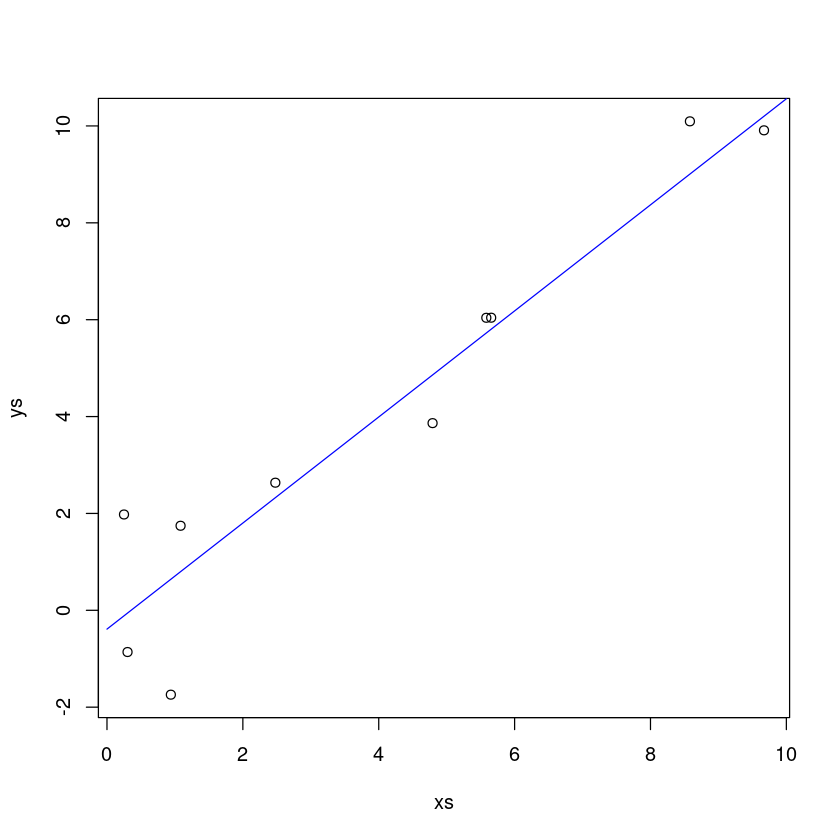

In [57]:
plot(xs, ys)
lines(xs.line, ys.line.fit, col = "blue")

In [59]:
cat(alpha.max, b.max, s.max)

0.8397048 -0.3994209 1.156727

### rjags

In [61]:
library(rjags)

In [75]:
help(dbin)

In [78]:
data <- NULL
data$X <- c(0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0)
data$n_samples <- 20

jm <- jags.model("prova.bugs", data)



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 24
   Unobserved stochastic nodes: 2
   Total graph size: 28

Initializing model



In [81]:
update(jm, 1000)
chain <- coda.samples(jm, c("p"),n.iter = 1000)

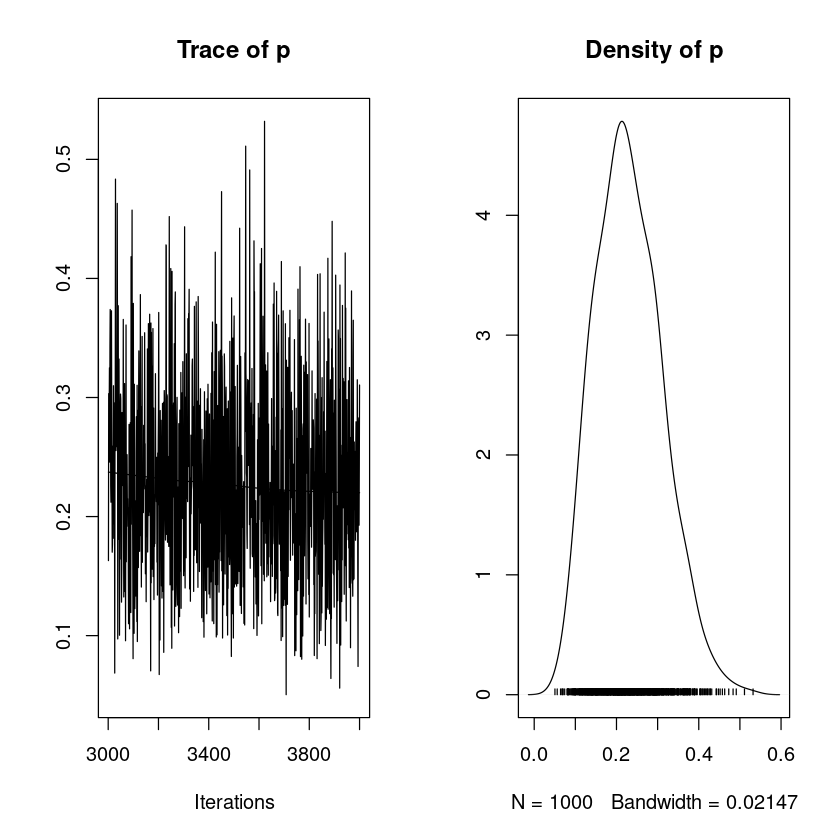

In [83]:
plot(chain)